<a href="https://colab.research.google.com/github/chirag-trivedi/data-science/blob/main/Visualization_with_Tips_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Context
A tip is considered as a monetary incentive that is given by the customers or guests for polite, prompt, and efficient service provided by the staff. The practice of giving tips has been continuing for a very long time and has become particularly popular in service industries such as hotels and restaurants.

Objective
Chef's Kitchen is one of the most popular restaurants in the city of San Diego and acts as a one-stop destination for food lovers. The polite and efficient service provided by the restaurant staff often gets them tips from the customer. As a Data Analyst for the restaurant, you have been asked to analyze the data provided to identify the patterns and trends in the revenue and tips received from customers across different demographies and come up with informative visualizations to convey the insights obtained from the analysis.


The dataset consists of the following features:
order_id: unique identifier of each order
day: day of the week on which the customer visited the restaurant (Thur/Fri/Sat/Sun)
time: time of the day at which the customer visited the restaurant (Lunch or Dinner)
size: number of people present at the table
smoker: whether the table included smokers (No: The table did not include smokers, Yes: The table included smokers)
sex: gender of the payer of the bill (Male or Female)
total_bill: the bill amount in dollars
tip: the tip amount in dollars
Let us first import the necessary libraries before starting our analysis.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [37]:
df = pd.read_csv("tips.csv")

In [38]:
df.head()

,order_id,day,time,size,smoker,sex,total_bill,tip
0,1,Sun,Dinner,2,No,Female,16.99,1.01
1,2,Sun,Dinner,3,No,Male,10.34,1.66
2,3,Sun,Dinner,3,No,Male,21.01,3.50
3,4,Sun,Dinner,2,No,Male,23.68,3.31
4,5,Sun,Dinner,4,No,Female,24.59,3.61


In [39]:
df.shape

(244, 8)

There are 244 rows and 8 columns

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    244 non-null    int64  
 1   day         244 non-null    object 
 2   time        244 non-null    object 
 3   size        244 non-null    int64  
 4   smoker      244 non-null    object 
 5   sex         244 non-null    object 
 6   total_bill  244 non-null    float64
 7   tip         244 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


There are ints, floats and objects in the data set

In [41]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,244.0,NaN,NaN,NaN,122.5,70.580923,1.0,61.75,122.5,183.25,244.0
day,244,4,Sat,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,244,2,Dinner,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size,244.0,NaN,NaN,NaN,2.569672,0.9511,1.0,2.0,2.0,3.0,6.0
smoker,244,2,No,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,244,2,Male,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bill,244.0,NaN,NaN,NaN,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,NaN,NaN,NaN,2.998279,1.383638,1.0,2.0,2.9,3.5625,10.0


The tip ranges from 1 to 10 dollars with the mean being around 3 $
The size of the table is from 1 to 6 ppl
THe bill size ranges from 3 $ to 50.81 $

Analyzing Numerical Variables with histplots and box plots

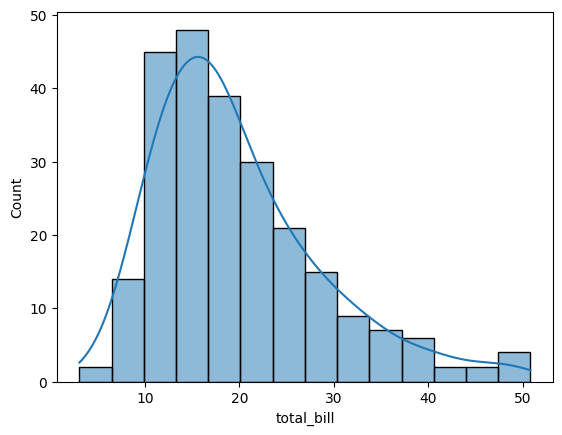

In [42]:
sns.histplot(data=df, x='total_bill',kde=True);

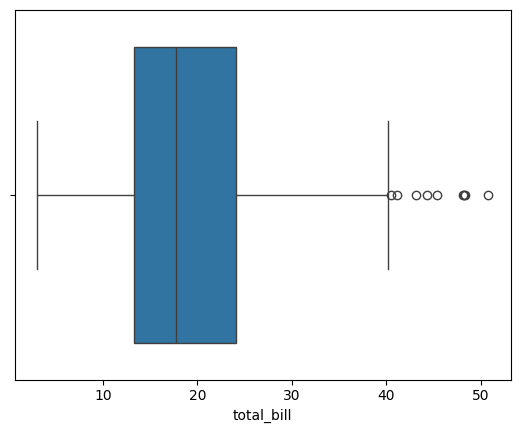

In [43]:
sns.boxplot(data=df, x='total_bill');

There are some outliers observed.For the total bill it seems to be right skewed.The median seems to be 18 dollars

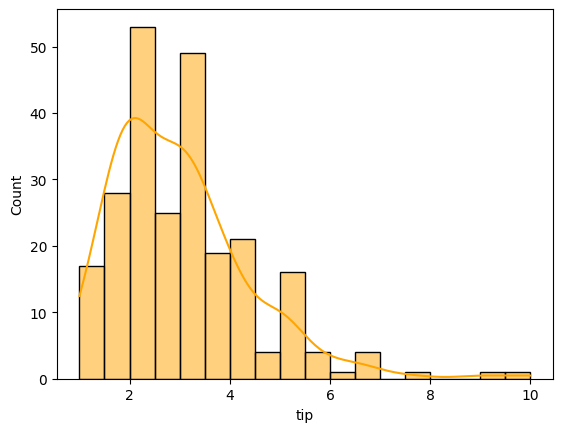

In [44]:
sns.histplot(data=df, x='tip',kde=True,color='orange');

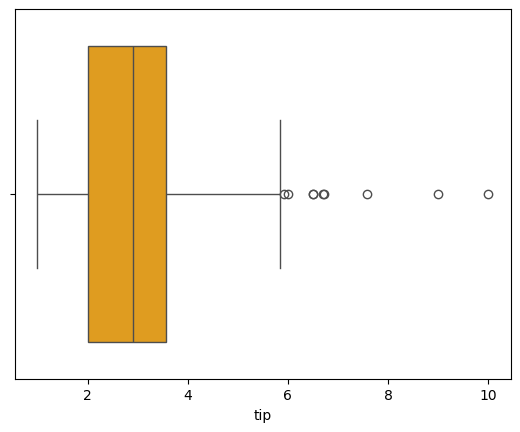

In [45]:
sns.boxplot(data=df, x='tip',color='orange');

There are quite a few outliers observed. It is right skewed
50 % pay less than 3 dollars and 50 % of the tips are between 2 and 4 dollars

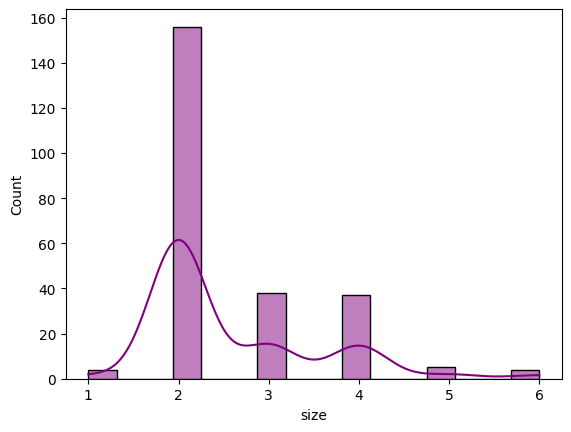

In [46]:
sns.histplot(data=df, x='size',color='purple',kde=True);
#

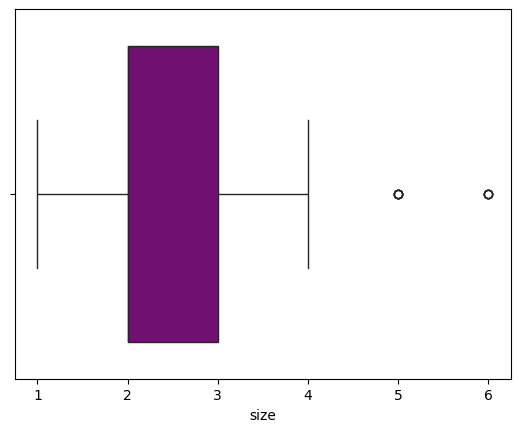

In [47]:
sns.boxplot(data=df, x='size',color='purple');

A few outliers are observed.50 % of the table size is between 2 and 3
with the min being 1 and max being 4

Visualizing categorical vars using bar plots

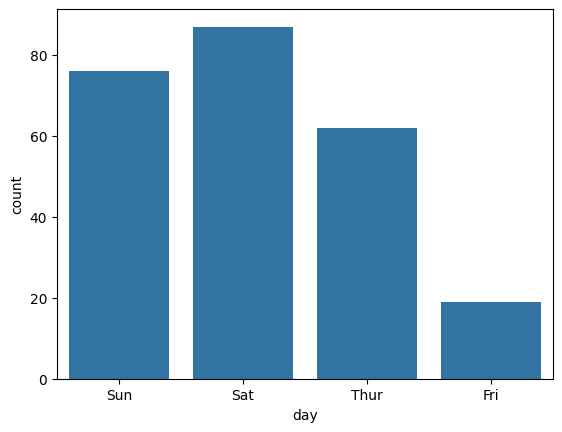

In [48]:
sns.countplot(data=df, x='day');

The no of orders is more on the weekend than weekdays

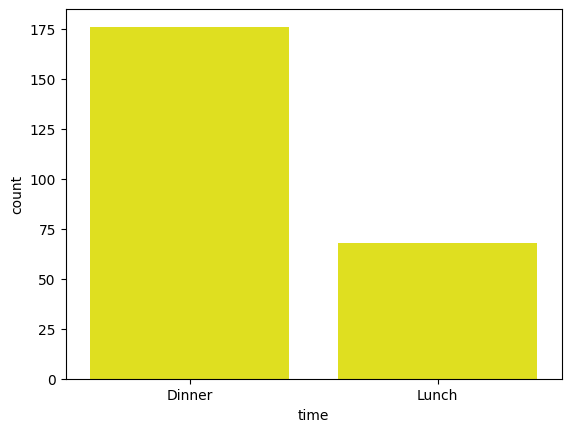

In [49]:
sns.countplot(data=df, x='time',color='yellow');

There are more people for Dinner compared to Lunch

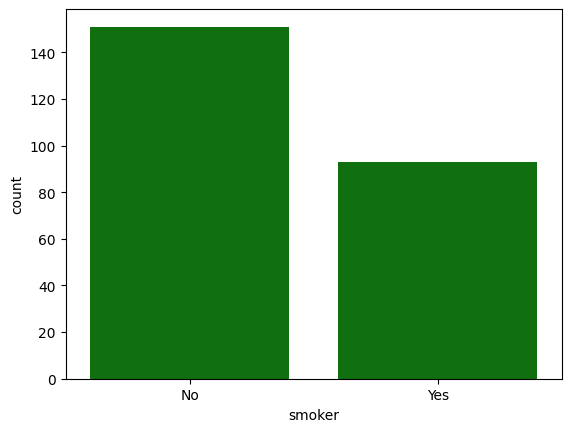

In [50]:
sns.countplot(data=df, x='smoker',color='green');

There are more non smokers than smokers

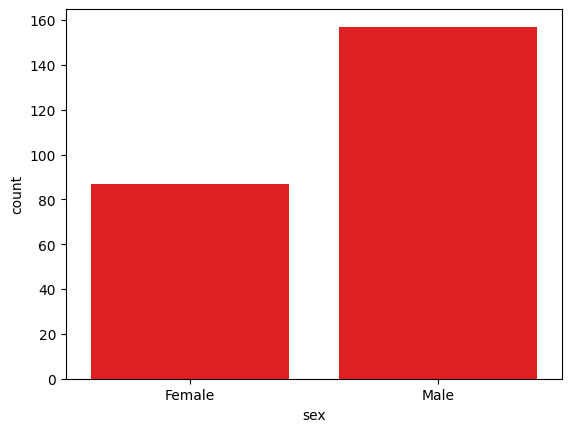

In [51]:
sns.countplot(data=df, x='sex',color='red');

There are more males than females who come

Heat Maps for Correlation

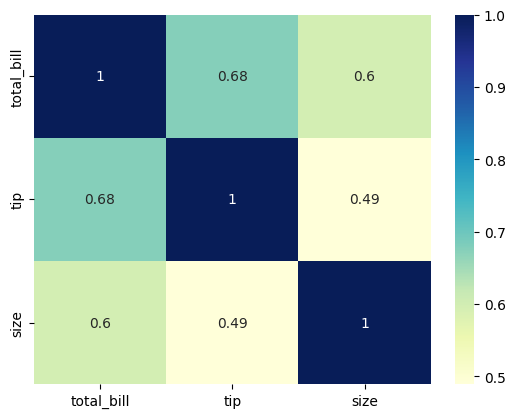

In [52]:
sns.heatmap(data=df[['total_bill','tip','size']].corr(),annot=True,cmap='YlGnBu');

We see a strong +ve correlation between total bill and tip and total bill and size
Tip and size are moderately co related

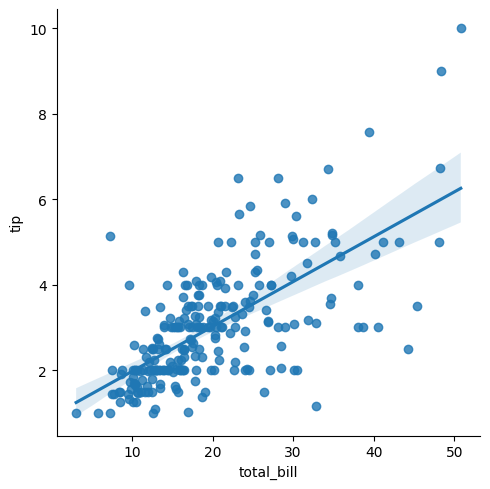

In [53]:
sns.lmplot(data=df, x='total_bill', y='tip');

We see a strong +Ve correlation between total bill and tip

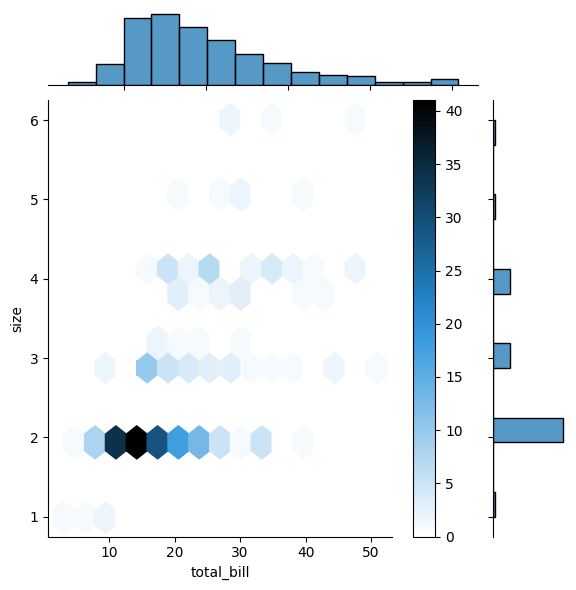

In [54]:
sns.jointplot(data=df, x='total_bill', y='size', kind='hex');
plt.colorbar();

Is the relationship between total_bill and tip valid with respect to the gender of the bill payer, smoking status, days and time at which the customer has visited the restaurant and also the group size?

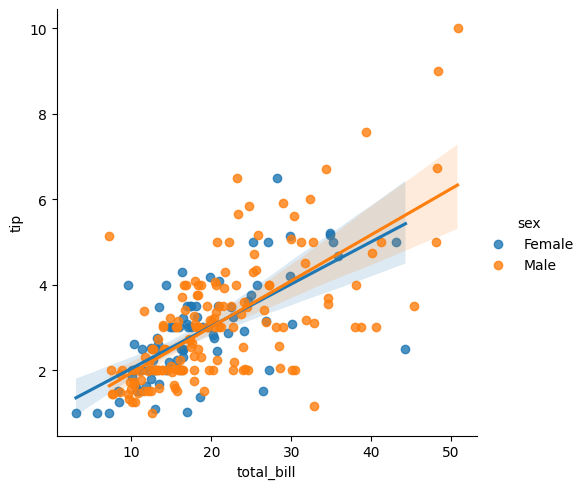

In [55]:
sns.lmplot(data=df, x='total_bill', y='tip', hue='sex');

The relationship between total bill and tip is linear wrt both genders

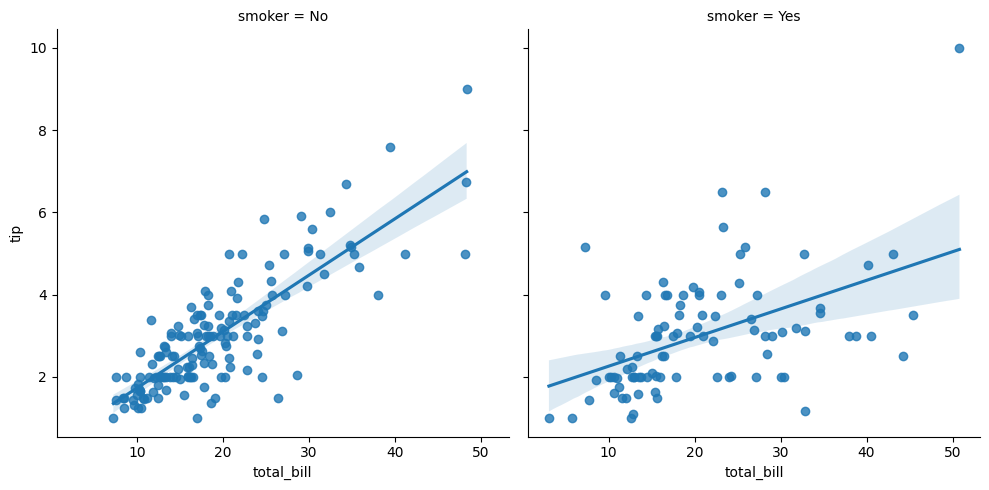

In [56]:
sns.lmplot(data=df, x='total_bill', y='tip', col='smoker');

Non smokers have a more +ve relationship with tips

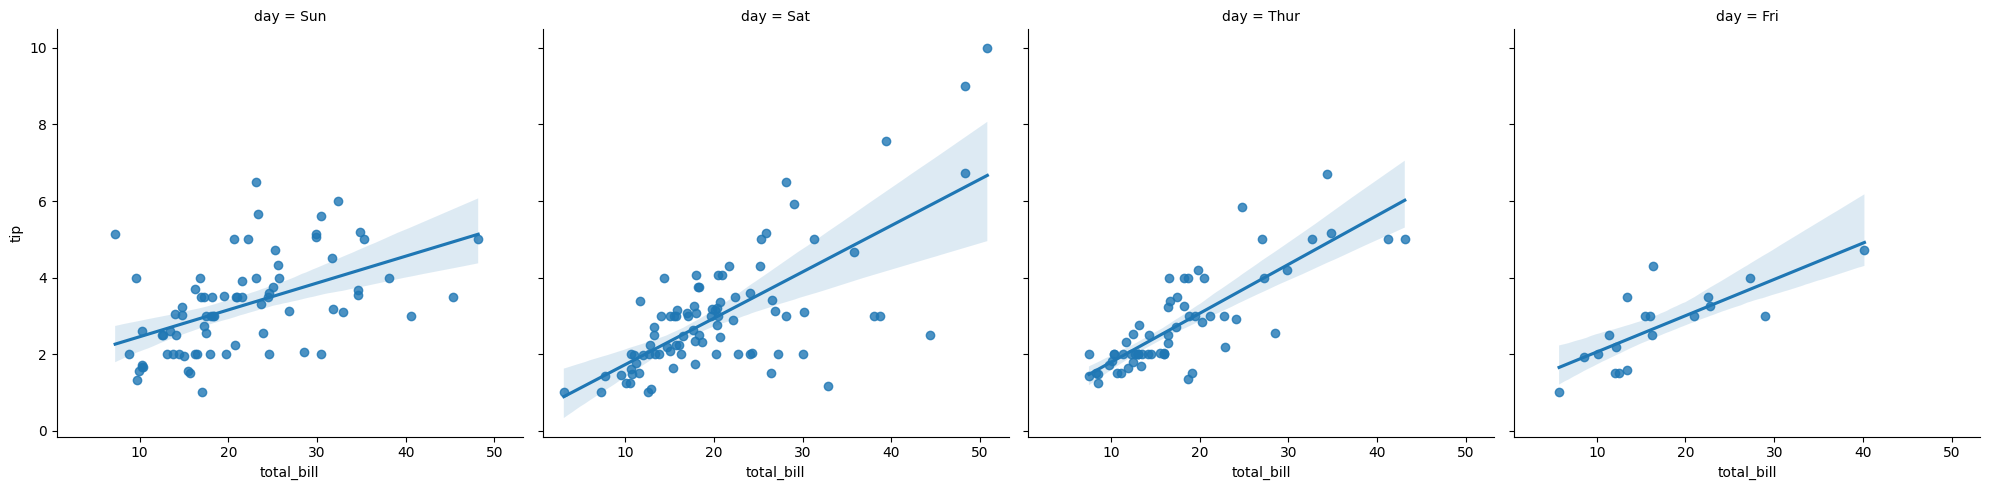

In [57]:
sns.lmplot(data=df, x='total_bill', y='tip', col='day');

The no of tips seem to be highest on sat
THe relation is linear wrt all days

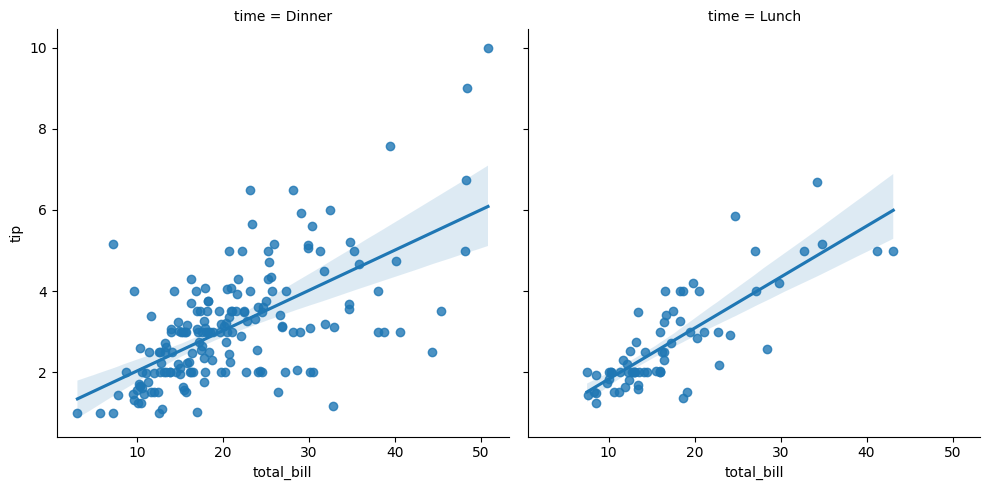

In [58]:
sns.lmplot(data=df, x='total_bill', y='tip', col='time');

Lunch and Dinner have +ve linnear relationships with tips being higher during dinner

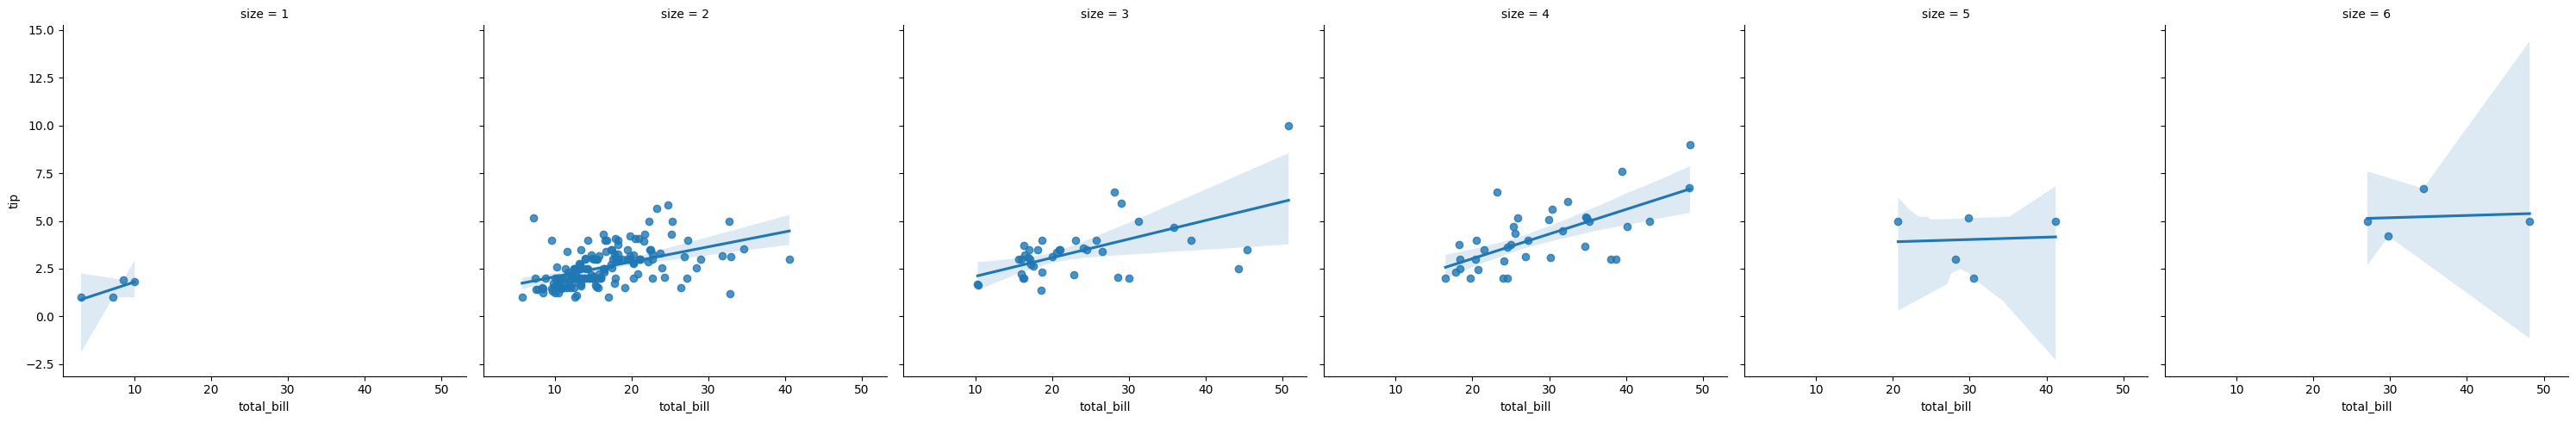

In [59]:
sns.lmplot(data=df, x='total_bill', y='tip', col='size');

As the size of the group increases the relationship is no longer linear

How does the bill amount and tip vary with respect to the day of visit?

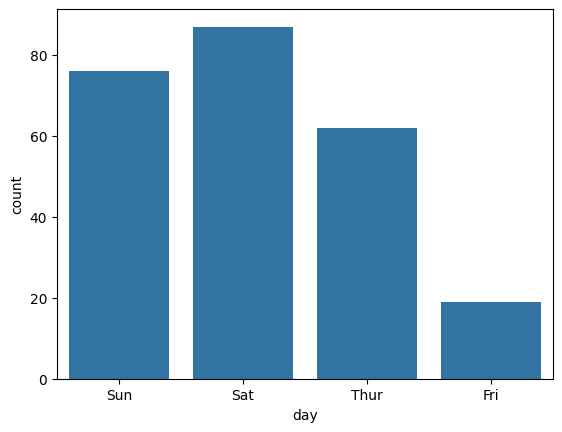

In [60]:
sns.countplot(data=df, x='day');

No of tips is higher during weekends

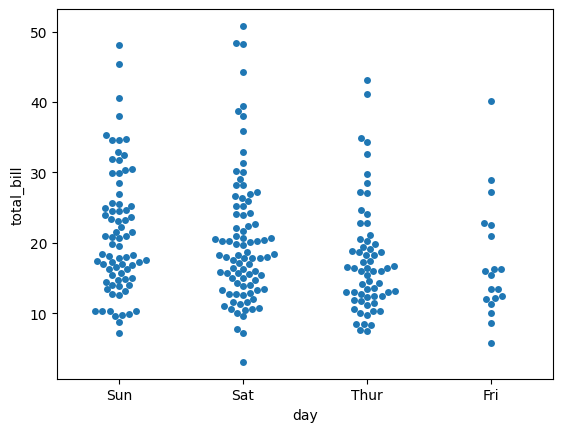

In [61]:
sns.swarmplot(data=df, x='day', y='total_bill');

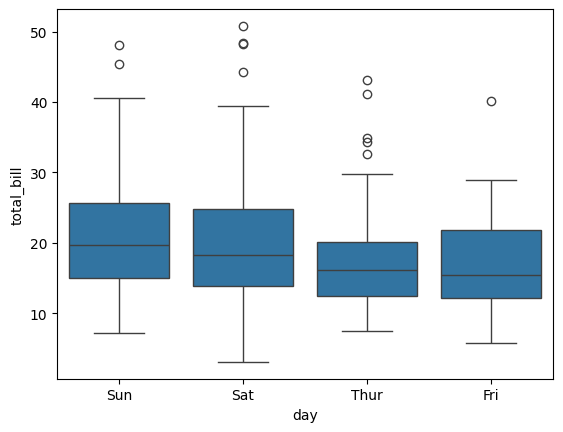

In [62]:
sns.boxplot(data=df, x='day', y='total_bill');

No of orders is higher on weekends

Which time of the day brings in higher bill and tip amounts?

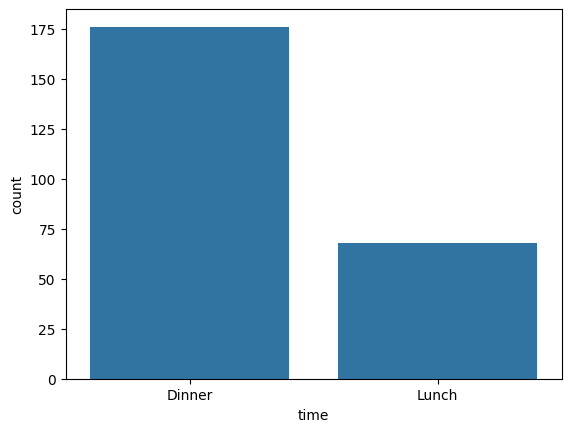

In [63]:
sns.countplot(data=df, x='time');

Dinner time has higher orders

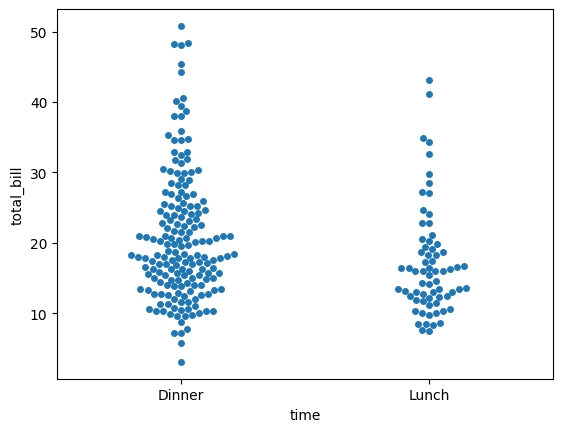

In [64]:
sns.swarmplot(data=df, x='time', y='total_bill');

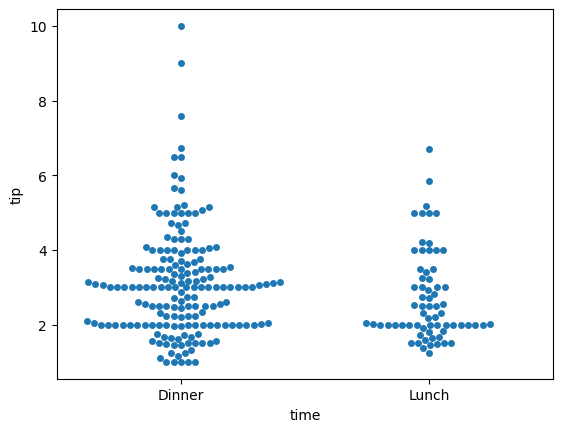

In [65]:
sns.swarmplot(data=df, x='time', y='tip');

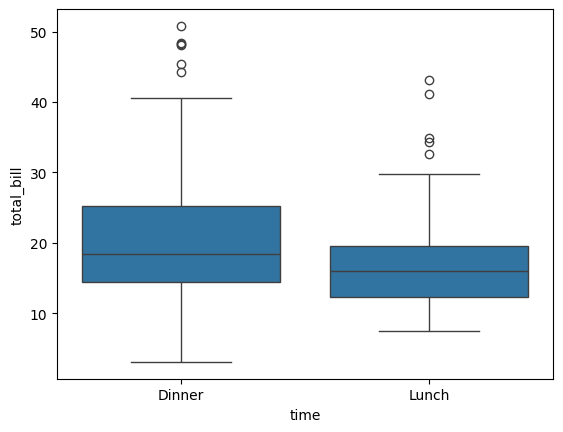

In [66]:
sns.boxplot(data=df, x='time', y='total_bill');

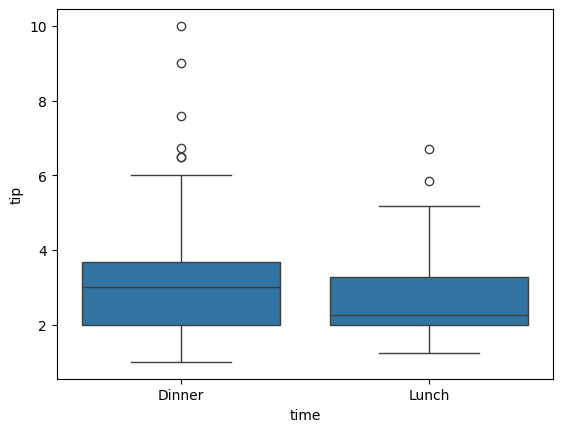

In [67]:
sns.boxplot(data=df, x='time', y='tip');

During dinner the tip seem to be higher

Ideally the tip amount should not vary with the gender of the bill payer. Is this assumption true with respect to the data provided? What is the count of male and female bill payers visiting each day?

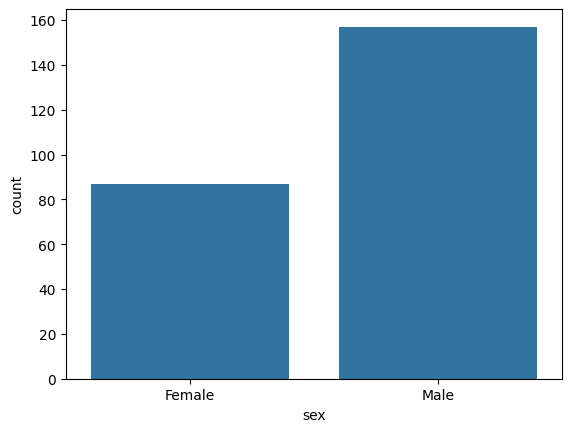

In [68]:
sns.countplot(data=df, x='sex');

There are more male than female visitors

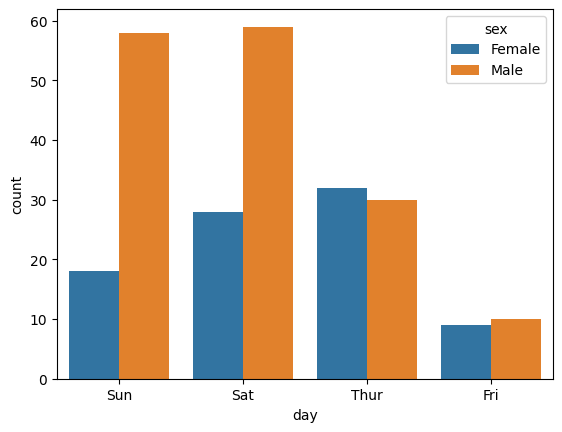

In [71]:
sns.countplot(data=df, x='day', hue='sex');

On the weekend and friday males tip more than females whereas females tip more than males on Thursday

What is the distribution between smokers and non-smokers? Do they have any relationship with 'tip'?

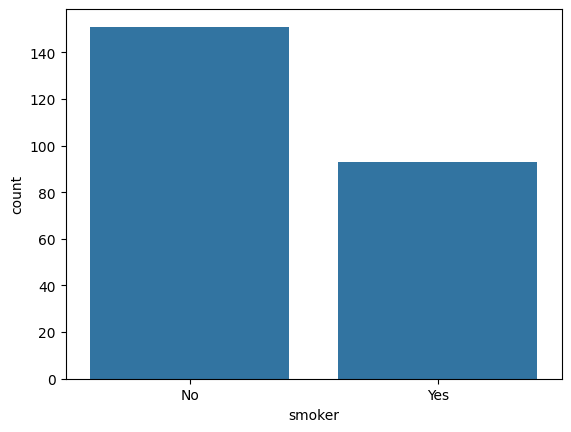

In [72]:
sns.countplot(data=df, x='smoker');

Non smokers are more than smokers

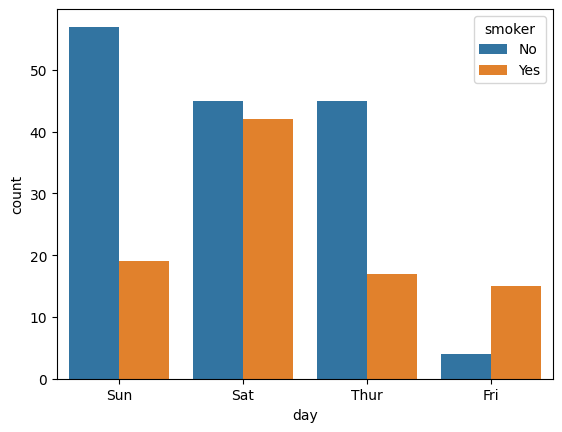

In [75]:
sns.countplot(data=df, x='day', hue='smoker');

On Thursday and Sunday non smokers tip much more than smokers
On Sat the tips are almost the same
whereas on Friday smokers tip more than non smokers


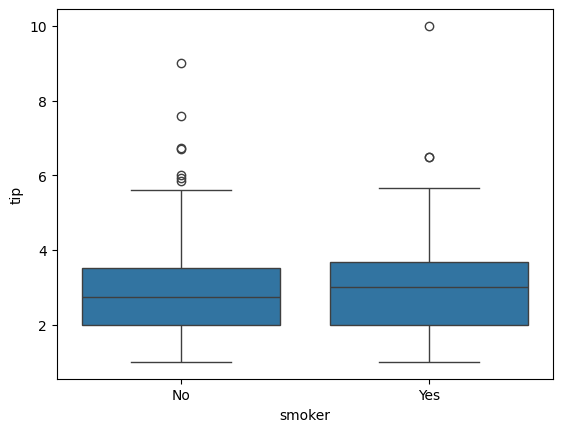

In [77]:
sns.boxplot(data=df, x='smoker', y='tip');

Median amount is almost the same

Insights:

The bill amount ranges from around 3 dollars to 50 dollars while the average bill amount is around 20 dollars. Half of the bill amounts are less than 18 dollars.

The tip amount ranges from around 1 dollar to 10 dollars. The mean and median of the tip amounts are very close to each other (~3 dollars).

The group size varies from 1 person to 6 people.
50% of the people pay less than 20 dollars for overall bill and 50% of the people pay less than 3 dollars as tip.

There is a linear relationship between total_bill and tip i.e higher the billing amount, higher is the tip amount and vice versa.

The relationship between total_bill and tip is linear with respect to both the genders, day and time

Non smokers show a more prominent linear relationship between total_bill and tip as compared to smokers

With respect to size of the group, this relationship between total_bill and tip gets constant as the size of the group increases.
The number of orders is higher on weekends as compared to the weekdays. The order count is higher during the dinner time as compared to lunch
The median billing amount on Saturdays and Sundays is higher than the other two days.
The median tip amount is almost equal during Friday, Saturday and Sunday and the median during these three days is higher as compared to Thursday

50% of the customers spend more than 19 dollars on the overall bill during the dinner time as compared to 16 dollars during lunch

The median tip amount given during dinner is almost 1 dollar higher than that given during lunch time.

The number of male and female bill payers is around 160 and 80 respectively i.e the number of male bill payers is almost double as compared to the number of female bill payers
On Saturdays and Sundays, the number of male bill payers is significantly higher than the number of female bill payers.
The median value for tip is almost equal for both the genders.
Males have a lot of outliers i.e far away values, giving higher tips.
The tables which included non-smokers is around 60 more than those which included smokers
The number of non-smokers is significantly higher than the number of smokers on Thursdays and Sundays

Among all the four days, only on Fridays,the number of smokers is higher than the number of non-smokers

There is no relation between smoking status and tips, the median is almost the same in both the classes